In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [2]:
sys.path.append("../")

In [3]:
from nupyk import trainers, plotutils

In [4]:
xgb_trainer = trainers.XGBRTrainer()

In [5]:
xgb_trainer.load_pickle_data("output/all_sources_processed.pkl")

In [6]:
xgb_trainer.dataframe.head()

,name,dec,ra,nu_peak,redshift,radio_freq_mean,radio_flux_mean,radio_flux_std,radio_flux_min,radio_flux_max,...,optical_freq_max,optical_freq_count,X_freq_std,X_freq_min,X_freq_max,X_freq_count,gamma_freq_std,gamma_freq_min,gamma_freq_max,gamma_freq_count
0,3HSPJ152316,58.5877,230.8169,16.0,0.350,1.400000e+09,1.431500e-16,1.930402e-17,1.295000e-16,1.568000e-16,...,8.402000e+14,13.0,1.274970e+17,1.295000e+15,2.660000e+17,6.0,NaN,NaN,NaN,NaN
1,3HSPJ001442,16.3573,3.6753,16.5,0.560,1.400000e+09,7.140000e-17,0.000000e+00,7.140000e-17,7.140000e-17,...,8.402000e+14,10.0,NaN,2.418000e+17,2.418000e+17,1.0,NaN,NaN,NaN,NaN
2,3HSPJ123417,-38.9431,188.5715,16.2,0.236,1.400000e+09,8.960000e-17,0.000000e+00,8.960000e-17,8.960000e-17,...,2.427000e+14,1.0,2.288116e+17,2.418000e+17,7.253000e+17,4.0,NaN,NaN,NaN,NaN
3,3HSPJ082707,8.6892,126.7795,17.0,0.410,1.400000e+09,1.975500e-16,1.364716e-17,1.879000e-16,2.072000e-16,...,8.402000e+14,10.0,1.386675e+17,1.295000e+15,2.418000e+17,3.0,NaN,NaN,NaN,NaN
4,3HSPJ015958,-36.7204,29.9923,15.8,0.530,1.400000e+09,6.300000e-17,0.000000e+00,6.300000e-17,6.300000e-17,...,4.455000e+14,1.0,1.386675e+17,1.295000e+15,2.418000e+17,3.0,NaN,NaN,NaN,NaN


In [7]:
model_settings = {
    "n_estimators": 1000,
    "learning_rate": 0.03,
    "objective": "reg:squarederror",
}

In [8]:
xgb_trainer.def_model(model_settings)

In [9]:
xgb_trainer.model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.03, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)

In [10]:
xgb_trainer.process()

In [11]:
xgb_trainer.fit_model()

Function: 'fit_model' took: 16.45 s


In [12]:
xgb_trainer.generate_metrics()
print(xgb_trainer.model_metrics)

                                 0
explained_variance_score  0.816601
max_error                 3.003025
mean_absolute_error       0.437957
mean_squared_error        0.368457
mean_squared_log_error    0.001368
median_absolute_error     0.323905
r2_score                  0.816488
mean_poisson_deviance     0.023860
mean_gamma_deviance       0.001557


In [13]:
xgb_trainer.save_model("test_model")

In [14]:
xgb_trainer.save_metrics("test_metrics")

In [15]:
xgb_test = trainers.XGBRTrainer()

In [16]:
xgb_test.load_pickle_model("models/test_model.pkl")

In [17]:
test_model = xgb_test.model

In [18]:
prediction = test_model.predict(xgb_trainer._x_test)

In [19]:
target = xgb_trainer._target_test

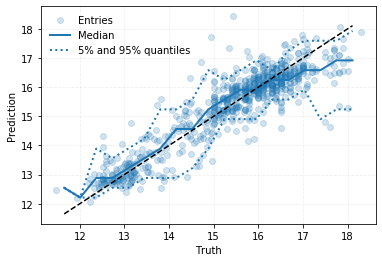

In [20]:
fig, ax = plt.subplots()
ax = plotutils.PredVsTargetPlot(ax, prediction, target).ax